In [2]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
import os as os
import datetime as dt
import prophet as pr
import sklearn as sk

In [3]:
# Replace the path below with the actual path to your CSV file if it's not in the same directory as your Jupyter Notebook
file_path = 'commodities_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)


In [13]:
# Convert the datetime column to a datetime object
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.8+ GB


In [5]:
df.head()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [6]:
# Group by 'item.class' and count unique 'item.id'
class_counts = df.groupby('item.class')['item.id'].nunique()

print("Number of unique items for each item class:")
print(class_counts)

Number of unique items for each item class:
item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Unknown           701
Name: item.id, dtype: int64


In [7]:
print(df['unit_price'].head())


0     109400
1       2000
2       2400
3     290200
4    9707000
Name: unit_price, dtype: int64


In [8]:
df['unit_price'].dtype

dtype('int64')

In [25]:
# find the item.id for khaz'gorite ore.
df[df['item.name'] == 'Khaz\'gorite Ore']['item.id'].unique()
# find the name of item.id 190314
df[df['item.id'] == 190314]['item.name'].unique()

array(["Khaz'gorite Ore"], dtype=object)

In [36]:
# search commodities_data.csv for vibrant wildercloth bolt and find the item.id
df[df['item.name'] == 'Vibrant Wildercloth Bolt']['item.id'].unique()
# find the name of item.id 193930
df[df['item.id'] == 193930]['item.name'].unique()

array(['Vibrant Wildercloth Bolt'], dtype=object)

In [42]:
# search commodities_data.csv for Lustrous Scaled Hide and find the item.id
df[df['item.name'] == 'Lustrous Scaled Hide']['item.id'].unique()
# find the name of item.id 193222
df[df['item.id'] == 193222]['item.name'].unique()

array(['Lustrous Scaled Hide'], dtype=object)

In [47]:
# search commodities_data.csv for Chromatic Dust and find the item.id
df[df['item.name'] == 'Chromatic Dust']['item.id'].unique()
# find the name of item.id 194123
df[df['item.id'] == 194123]['item.name'].unique()

array(['Chromatic Dust'], dtype=object)

In [57]:
# search commodities_data.csv for Dracothyst Shard and find the item.id
df[df['item.name'] == 'Dracothyst']['item.id'].unique()
# find the name of item.id 204463
df[df['item.id'] == 204463]['item.name'].unique()

array(['Dracothyst'], dtype=object)

In [26]:
# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format
# Correct unit_price to gold by dividing by 10000
df['unit_price'] = df['unit_price']/10000
# Look at the unit_price of Khaz'gorite Ore without scientific notation
df[df['item.id'] == 190314]['unit_price'].describe()


count    92334.00
mean      1488.88
std      24148.83
min         99.00
25%        133.00
50%        148.72
75%        185.77
max     494420.00
Name: unit_price, dtype: float64

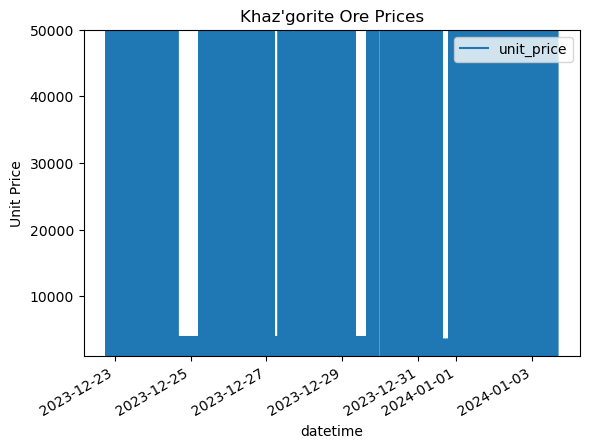

In [29]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Assuming you've already created your plot
plot = df[df['item.id'] == 190314].plot(x='datetime', y='unit_price', title="Khaz'gorite Ore Prices")
plot.set_ylabel('Unit Price')

# Set custom Y-axis limits
custom_y_min = 1000  # Replace with your chosen minimum value
custom_y_max = 50000  # Replace with your chosen maximum value
plot.set_ylim(custom_y_min, custom_y_max)

# Format the y-axis to display the actual price
plot.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Show the plot
plt.show()



<Axes: title={'center': "Khaz'gorite Ore Prices"}, xlabel='datetime'>

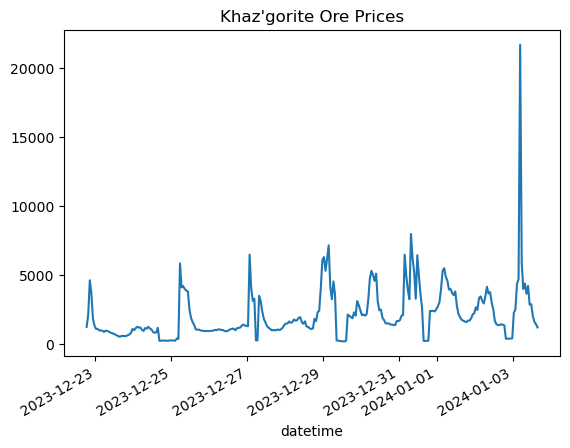

In [30]:
# Look at the mean unit_price of Khaz'gorite Ore by day
df[df['item.id'] == 190314].groupby('datetime')['unit_price'].mean().plot(title="Khaz'gorite Ore Prices")

In [37]:
# Look at the unit_price of Vibrant Wildercloth Bolt without scientific notation
df[df['item.id'] == 193930]['unit_price'].describe()


count     39792.00
mean      43572.66
std      633827.19
min           8.34
25%          10.55
50%          12.67
75%          18.00
max     9999999.99
Name: unit_price, dtype: float64

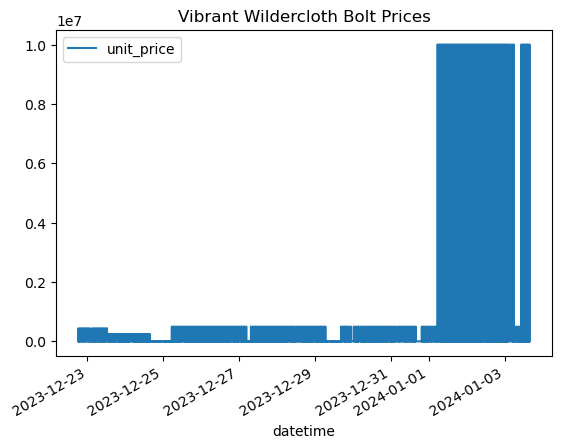

In [38]:
# Visualize the unit_price of Vibrant Wildercloth Bolt over time
plot = df[df['item.id'] == 193930].plot(x='datetime', y='unit_price', title='Vibrant Wildercloth Bolt Prices')

<Axes: title={'center': 'Vibrant Wildercloth Bolt Prices'}, xlabel='datetime'>

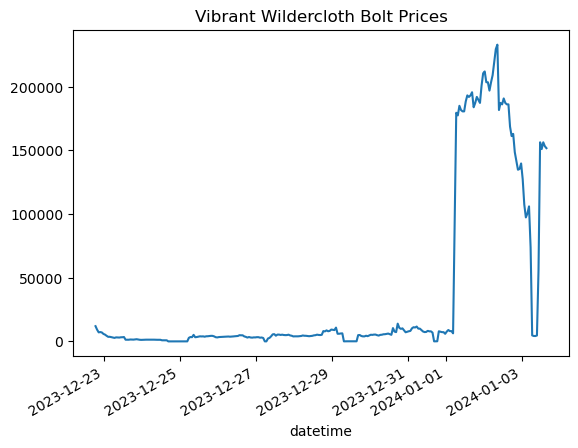

In [39]:
# Look at the mean unit_price of Vibrant Wildercloth Bolt by day
df[df['item.id'] == 193930].groupby('datetime')['unit_price'].mean().plot(title='Vibrant Wildercloth Bolt Prices')

In [43]:
# Look at the unit_price of Lustrous Scaled Hide without scientific notation
df[df['item.id'] == 193222]['unit_price'].describe()

count    64713.00
mean      1941.16
std      28669.57
min         65.99
25%        124.99
50%        142.00
75%        163.20
max     494420.00
Name: unit_price, dtype: float64

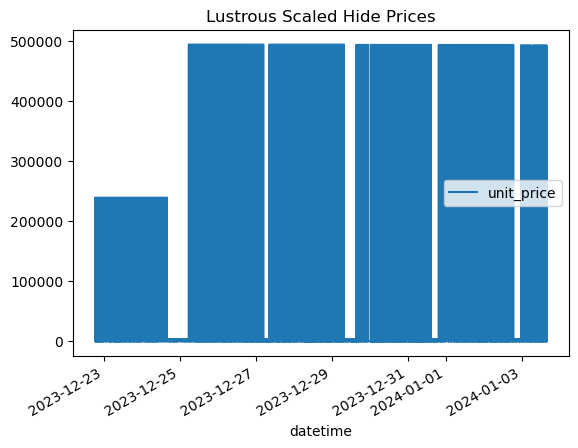

In [44]:
 # Visualize the unit_price of Lustrous Scaled Hide over time without scientific notation being used for the y-axis
plot = df[df['item.id'] == 193222].plot(x='datetime', y='unit_price', title='Lustrous Scaled Hide Prices')

<Axes: title={'center': 'Lustrous Scaled Hide Prices'}, xlabel='datetime'>

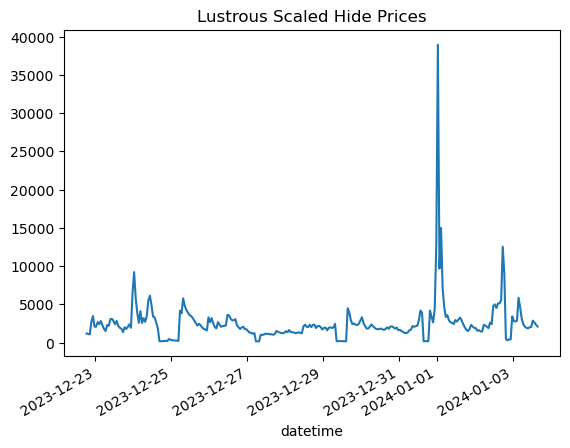

In [45]:
# Look at the mean unit_price of Lustrous Scaled Hide by day
df[df['item.id'] == 193222].groupby('datetime')['unit_price'].mean().plot(title='Lustrous Scaled Hide Prices')

In [48]:
# Look at the unit_price of Chromatic Dust without scientific notation
df[df['item.id'] == 194123]['unit_price'].describe()

count    70945.00
mean      3478.18
std      39823.00
min          1.75
25%          3.93
50%          4.40
75%          5.30
max     500000.00
Name: unit_price, dtype: float64

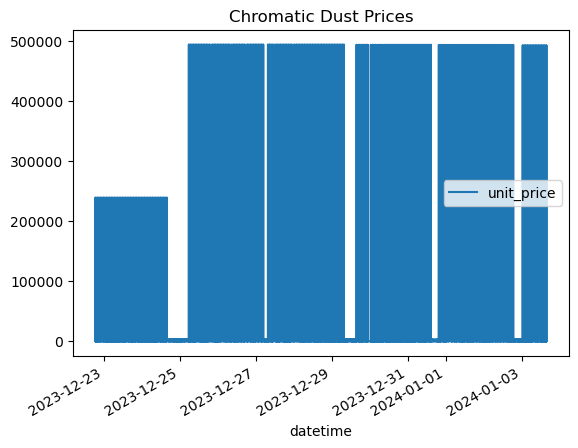

In [20]:
# Visualize the unit_price of Chromatic Dust over time
plot = df[df['item.id'] == 194123].plot(x='datetime', y='unit_price', title='Chromatic Dust Prices')

<Axes: title={'center': 'Chromatic Dust Prices'}, xlabel='datetime'>

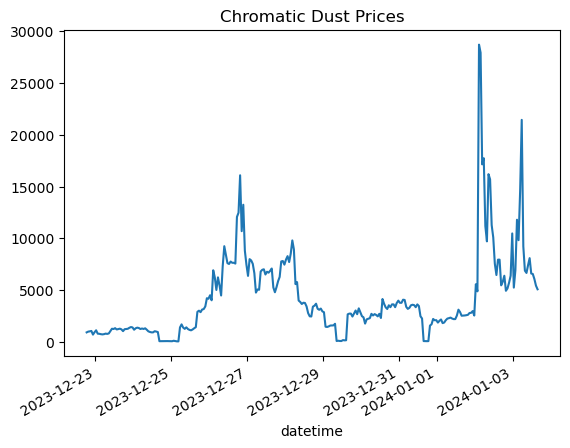

In [49]:
# visualize the mean unit_price of Chromatic Dust by day
df[df['item.id'] == 194123].groupby('datetime')['unit_price'].mean().plot(title='Chromatic Dust Prices')

In [58]:
# Look at the unit_price of Dracothyst shard without scientific notation
df[df['item.id'] == 204463]['unit_price'].describe()

count    51909.00
mean      7850.38
std      36549.84
min       4084.24
25%       4337.00
50%       4497.88
75%       5192.00
max     494420.00
Name: unit_price, dtype: float64

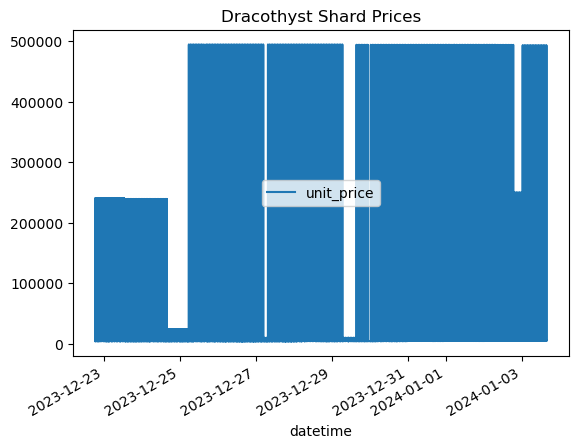

In [59]:
# Visualize the unit_price of Dracothyst shard over time
plot = df[df['item.id'] == 204463].plot(x='datetime', y='unit_price', title='Dracothyst Shard Prices')

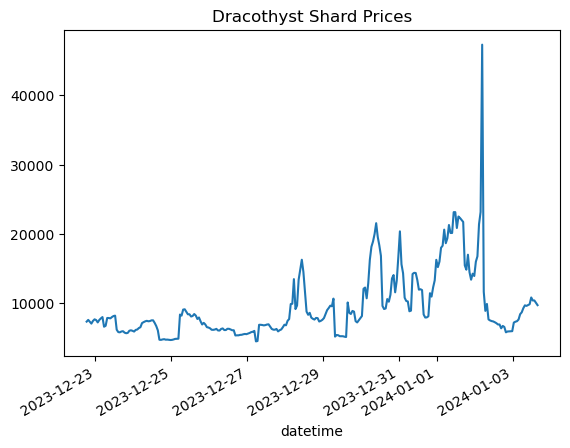

In [62]:
# Visualize the mean unit_price of Dracothyst shard by day. Divide the unit_price by 10000 to convert it to gold.
plot = df[df['item.id'] == 204463].groupby('datetime')['unit_price'].mean().plot(title='Dracothyst Shard Prices')



# Show the plot
plt.show()


In [65]:
# Look at the unit_price of Bubble Poppy without scientific notation
df[df['item.id'] == 191469]['unit_price'].describe()

count    85422.00
mean      1677.19
std      27655.04
min          1.36
25%          2.94
50%          3.36
75%          4.32
max     494420.00
Name: unit_price, dtype: float64

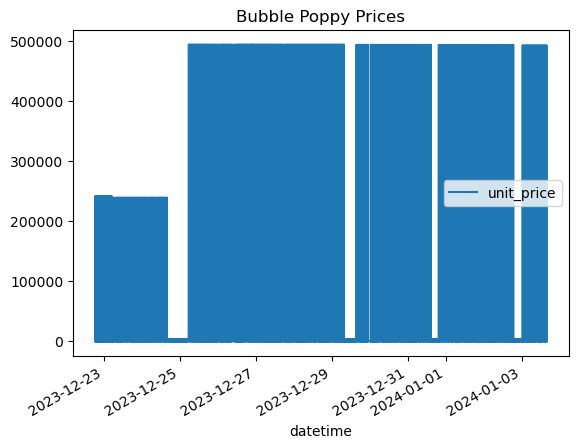

In [66]:
# Visualize the unit_price of Bubble Poppy over time
plot = df[df['item.id'] == 191469].plot(x='datetime', y='unit_price', title='Bubble Poppy Prices')

<Axes: title={'center': 'Bubble Poppy Average Prices'}, xlabel='datetime'>

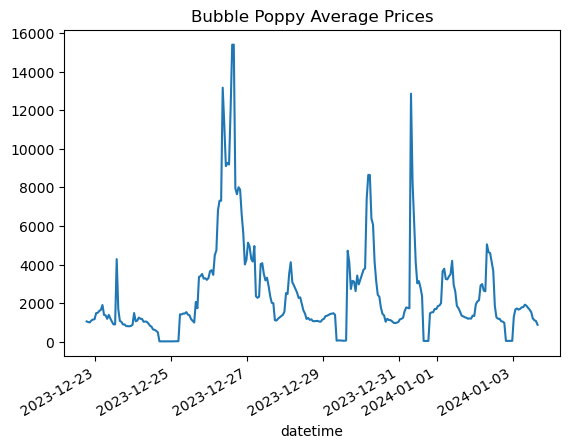

In [68]:
# Look at the mean unit_price of Bubble Poppy by day
df[df['item.id'] == 191469].groupby('datetime')['unit_price'].mean().plot(title='Bubble Poppy Average Prices')

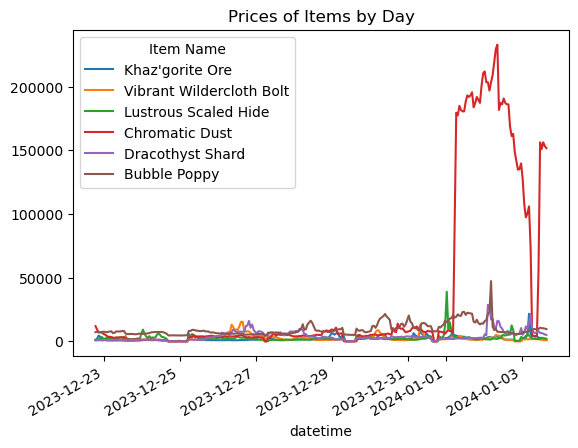

In [70]:
# Create a new data frame containing only the details of the items we're interested in
df2 = df[df['item.id'].isin([190314, 193930, 193222, 194123, 204463, 191469])]

# Look at the mean unit_price of each item by day. Unstack the data to make it easier to plot. Make sure to display the price in gold and not scientific.
plot = df2.groupby(['datetime', 'item.id'])['unit_price'].mean().unstack().plot(title='Prices of Items by Day')

# Replace the label item.id with the item names
plot.legend(title='Item Name', labels=['Khaz\'gorite Ore', 'Vibrant Wildercloth Bolt', 'Lustrous Scaled Hide', 'Chromatic Dust', 'Dracothyst Shard', 'Bubble Poppy'])

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt

# Show the plot
plt.show()


In [73]:
# Save the new data frame to a CSV file and save it to the same directory as your Jupyter Notebook
df2.to_csv('endgame_items.csv', index=False)



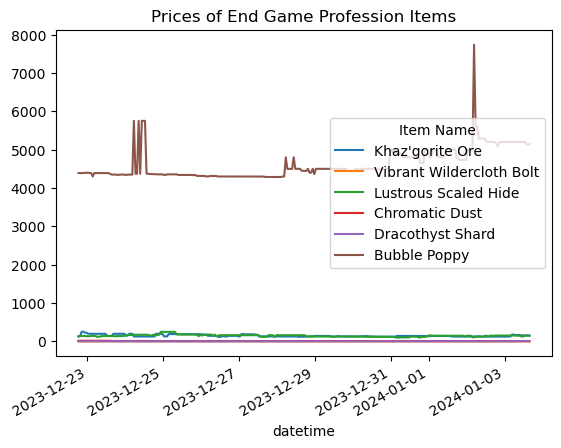

In [75]:
# Look at the mode for the unit_price of the items we're interested in.
df2.groupby(['datetime', 'item.id'])['unit_price'].agg(lambda x: x.mode()[0]).unstack().plot(title='Prices of End Game Profession Items')
# Replace the label item.id with the item names
plt.legend(title='Item Name', labels=['Khaz\'gorite Ore', 'Vibrant Wildercloth Bolt', 'Lustrous Scaled Hide', 'Chromatic Dust', 'Dracothyst Shard', 'Bubble Poppy'])

In [20]:
import matplotlib.pyplot as plt

# Create a new dataframe to store the forecast results
forecast_df = pd.DataFrame()

# Iterate over each item
for item_id in [190314, 193930, 193222, 194123, 204463, 191469]:
    # Filter the data for the current item
    item_data = df[df['item.id'] == item_id][['datetime', 'unit_price']]
    item_data.columns = ['ds', 'y']  # Rename the columns for Prophet
    
    # Create a new Prophet model
    model = Prophet()
    
    # Fit the model to the data
    model.fit(item_data)
    
    # Make a future dataframe for the next 30 days
    future = model.make_future_dataframe(periods=30)
    
    # Make predictions for the future dates
    forecast = model.predict(future)
    
    # Add the forecast results to the forecast dataframe
    forecast_df = pd.concat([forecast_df, forecast[['ds', 'yhat']]], axis=1)
    
    # Plot the forecast
    plt.plot(forecast['ds'], forecast['yhat'], label=item_data['item.id'].unique()[0])

# Set the labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Gold')
plt.title('Prophet Forecast for Items')

# Replace the item.id labels with the item names
plt.legend(title='Item Name', labels=['Khaz\'gorite Ore', 'Vibrant Wildercloth Bolt', 'Lustrous Scaled Hide', 'Chromatic Dust', 'Dracothyst Shard', 'Bubble Poppy'])

# Show the plot
plt.show()



NameError: name 'Prophet' is not defined